<a href="https://colab.research.google.com/github/KonnetiPoojaSri/PRODIGY_DS_01/blob/main/Cigarettes%26AlcoholAddiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Working on data preprocessing and EDA to identify key patterns and insights from real-world datasets during my internship at Prodigy Infotech


The Dataset I chose from Kaggle is
"addiction_population_data.csv"

## Data loading:
 Data loading is like unlocking the door to your data. Without it, you can't begin cleaning, analyzing, or modeling.

### Subtask:
Loading the "addiction_population_data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "addiction_population_data.csv" file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('addiction_population_data.csv')
display(df.head())

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


## Data exploration
Data exploration gives you the "story" behind the data before you begin modeling or decision-making. It ensures you don’t build analysis on flawed or misunderstood data.

### Subtask:
Exploring the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables. Determining the shape of the data.


**Reasoning**:
I need to explore the dataset's structure, identify missing values, data types, and distributions of key variables, and determine the data's shape.  I can do this using `.shape`, `.info()`, `.describe()`, `.unique()`, `.value_counts()`, and histograms.



Shape of the DataFrame: (3000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3000 non-null   int64  
 1   name                       3000 non-null   object 
 2   age                        3000 non-null   int64  
 3   gender                     3000 non-null   object 
 4   country                    3000 non-null   object 
 5   city                       3000 non-null   object 
 6   education_level            2580 non-null   object 
 7   employment_status          3000 non-null   object 
 8   annual_income_usd          3000 non-null   int64  
 9   marital_status             3000 non-null   object 
 10  children_count             3000 non-null   int64  
 11  smokes_per_day             3000 non-null   int64  
 12  drinks_per_week            3000 non-null   int64  
 

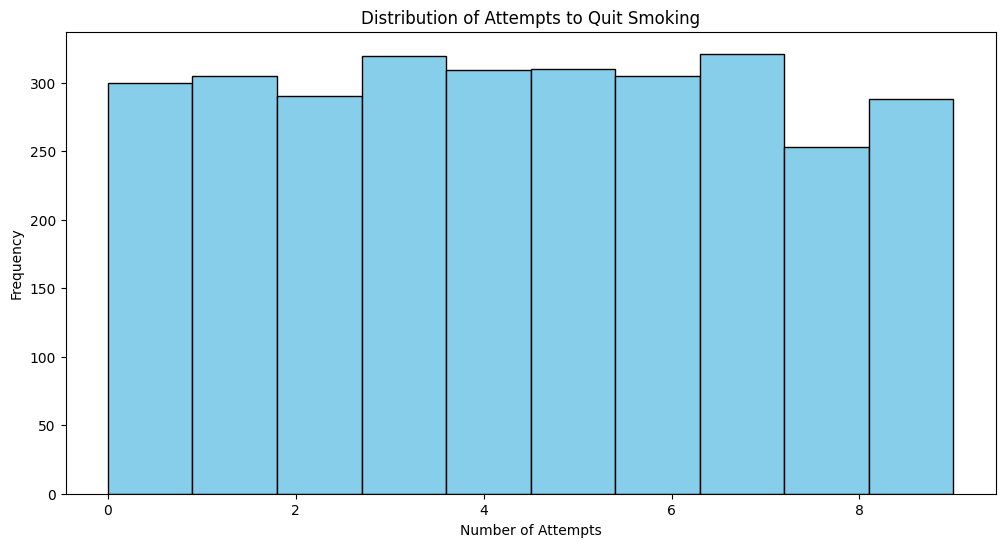

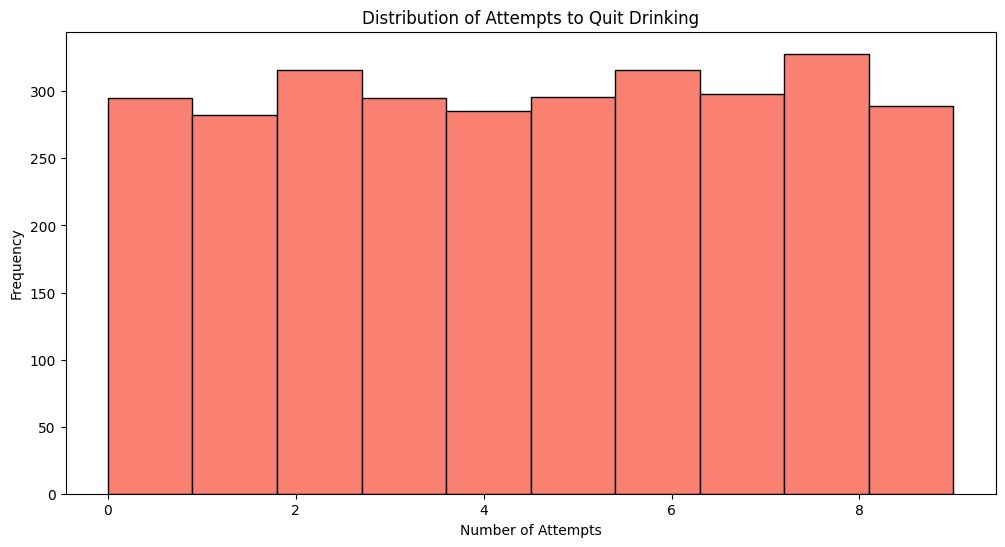

In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Explore unique values for categorical columns
categorical_cols = ['gender', 'education_level', 'employment_status', 'marital_status', 'mental_health_status', 'exercise_frequency', 'diet_quality', 'social_support', 'therapy_history']
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].value_counts(dropna=False))

# Analyze the distribution of key variables related to addiction
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df['attempts_to_quit_smoking'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Attempts to Quit Smoking')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['attempts_to_quit_drinking'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Attempts to Quit Drinking')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.show()

## Data cleaning
Data cleaning is about making your data trustworthy. It’s the foundation for valid analysis and insights.

### Subtask:
Cleanning the data by handling missing values, addressing inconsistencies, and converting data types as needed. Removing duplicate rows.


**Reasoning**:
Handle missing values in specified columns, address inconsistencies in categorical columns, convert data types where needed, and remove duplicate rows.



In [3]:
# Handle missing values
# Impute missing values in 'education_level' with the mode
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)

# Impute missing values in 'social_support' with the mode
df['social_support'].fillna(df['social_support'].mode()[0], inplace=True)

# Remove rows with missing values in 'therapy_history' as imputation may introduce bias
df.dropna(subset=['therapy_history'], inplace=True)


# Address data inconsistencies
# Standardize categorical columns (example: 'mental_health_status')
df['mental_health_status'] = df['mental_health_status'].str.lower()

# Convert data types if needed


# Remove duplicate rows
df.drop_duplicates(inplace=True)

<ipython-input-3-f9a5ed472013>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
<ipython-input-3-f9a5ed472013>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

**Reasoning**:
Correct the previous code block to handle the FutureWarnings and complete the data cleaning steps.



In [4]:
# Handle missing values
# Impute missing values in 'education_level' with the mode
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])

# Impute missing values in 'social_support' with the mode
df['social_support'] = df['social_support'].fillna(df['social_support'].mode()[0])

# Remove rows with missing values in 'therapy_history' as imputation may introduce bias
df.dropna(subset=['therapy_history'], inplace=True)


# Address data inconsistencies
# Standardize categorical columns (example: 'mental_health_status')
df['mental_health_status'] = df['mental_health_status'].str.lower()

# Convert data types if needed
# Example (if needed): df['age'] = pd.to_numeric(df['age'], errors='coerce')


# Remove duplicate rows
df.drop_duplicates(inplace=True)

## Data analysis
Data analysis transforms data into understanding. It’s how you get real value from data and guide smart actions.

### Subtask:
Perform descriptive statistics and analyze data distribution.


**Reasoning**:
Calculate descriptive statistics, analyze data distributions, compute correlations, and analyze relationships between addiction variables and demographic/socioeconomic factors.



               age  annual_income_usd  attempts_to_quit_smoking  \
count  1986.000000        1986.000000               1986.000000   
mean     46.477341       99313.147029                  4.444109   
std      18.642568       57705.617797                  2.855398   
min      15.000000         560.000000                  0.000000   
25%      31.000000       49456.000000                  2.000000   
50%      46.000000       99689.500000                  4.000000   
75%      62.000000      150264.750000                  7.000000   
max      79.000000      199951.000000                  9.000000   

       attempts_to_quit_drinking  sleep_hours          bmi  children_count  \
count                1986.000000  1986.000000  1986.000000     1986.000000   
mean                    4.566465     6.441843    25.189879        2.472306   
std                     2.854642     1.505304     5.058071        1.711861   
min                     0.000000     1.500000    10.400000        0.000000   
25%   

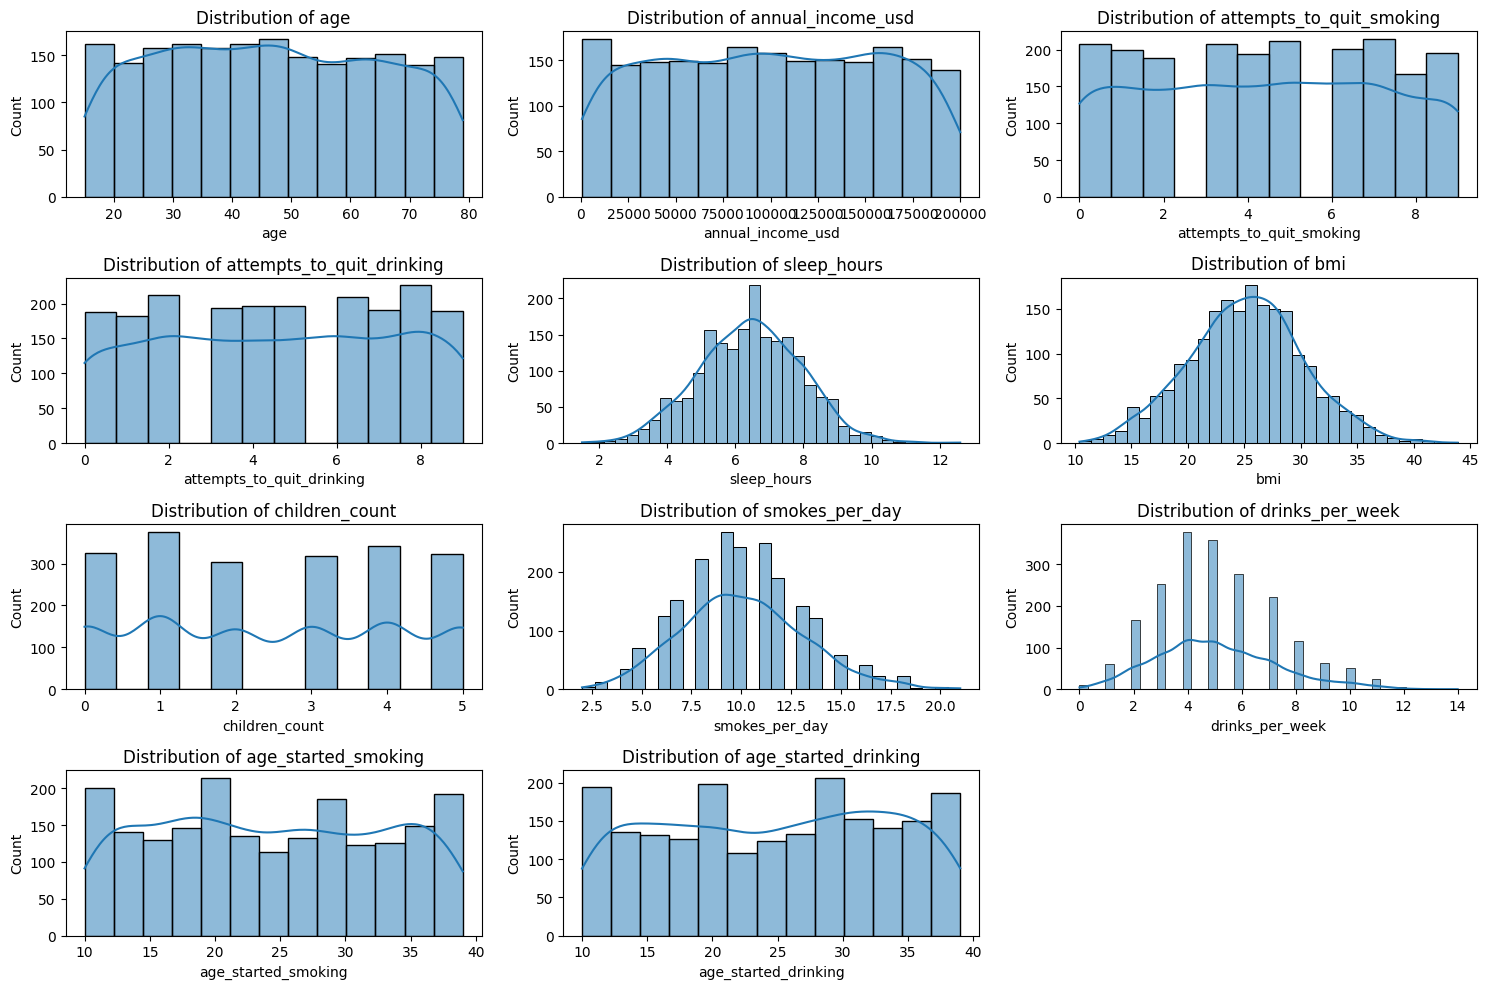

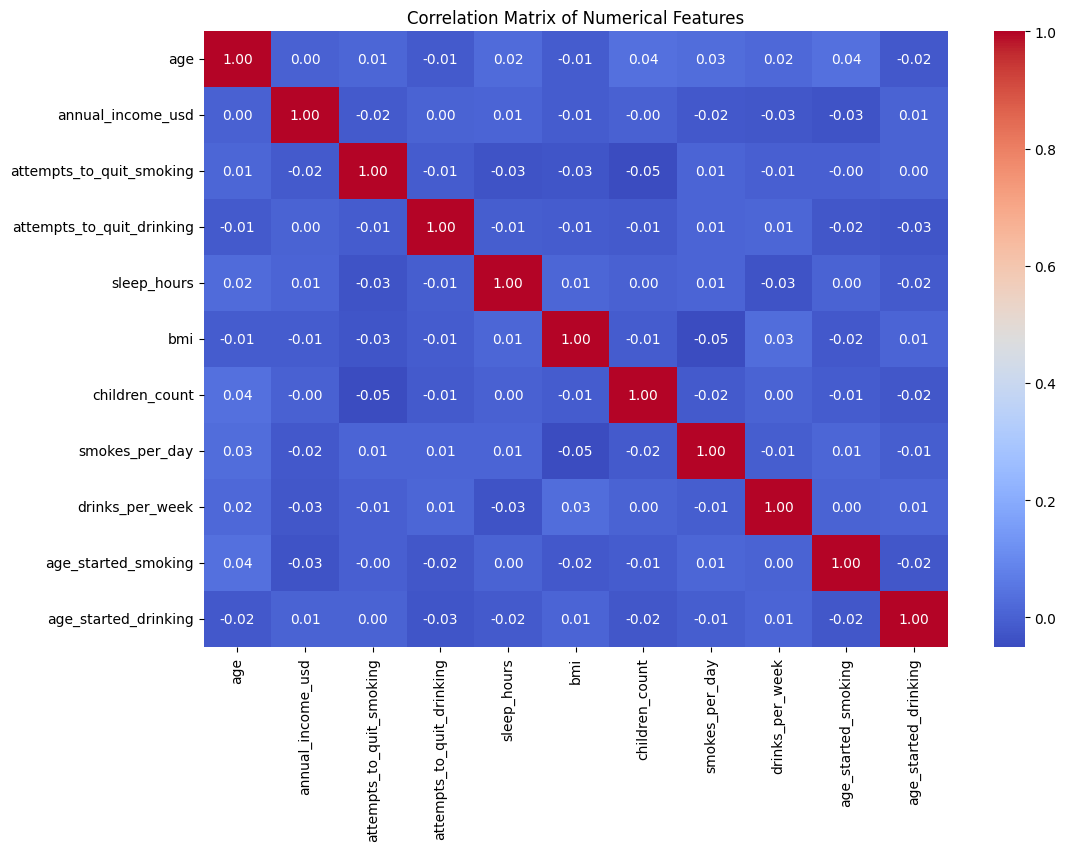

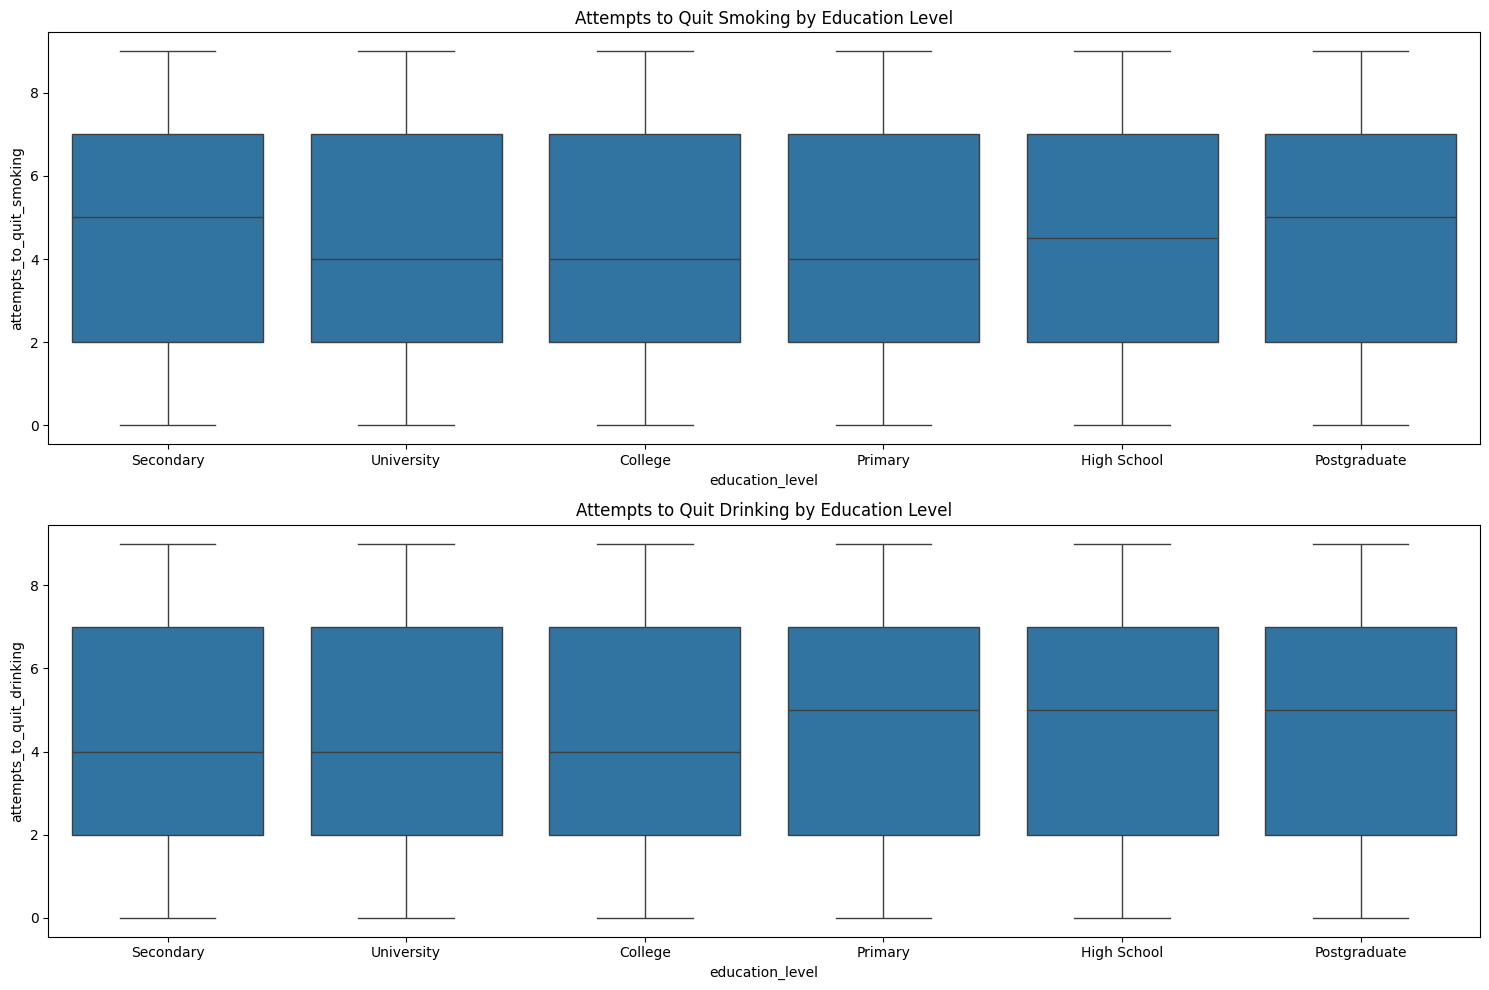

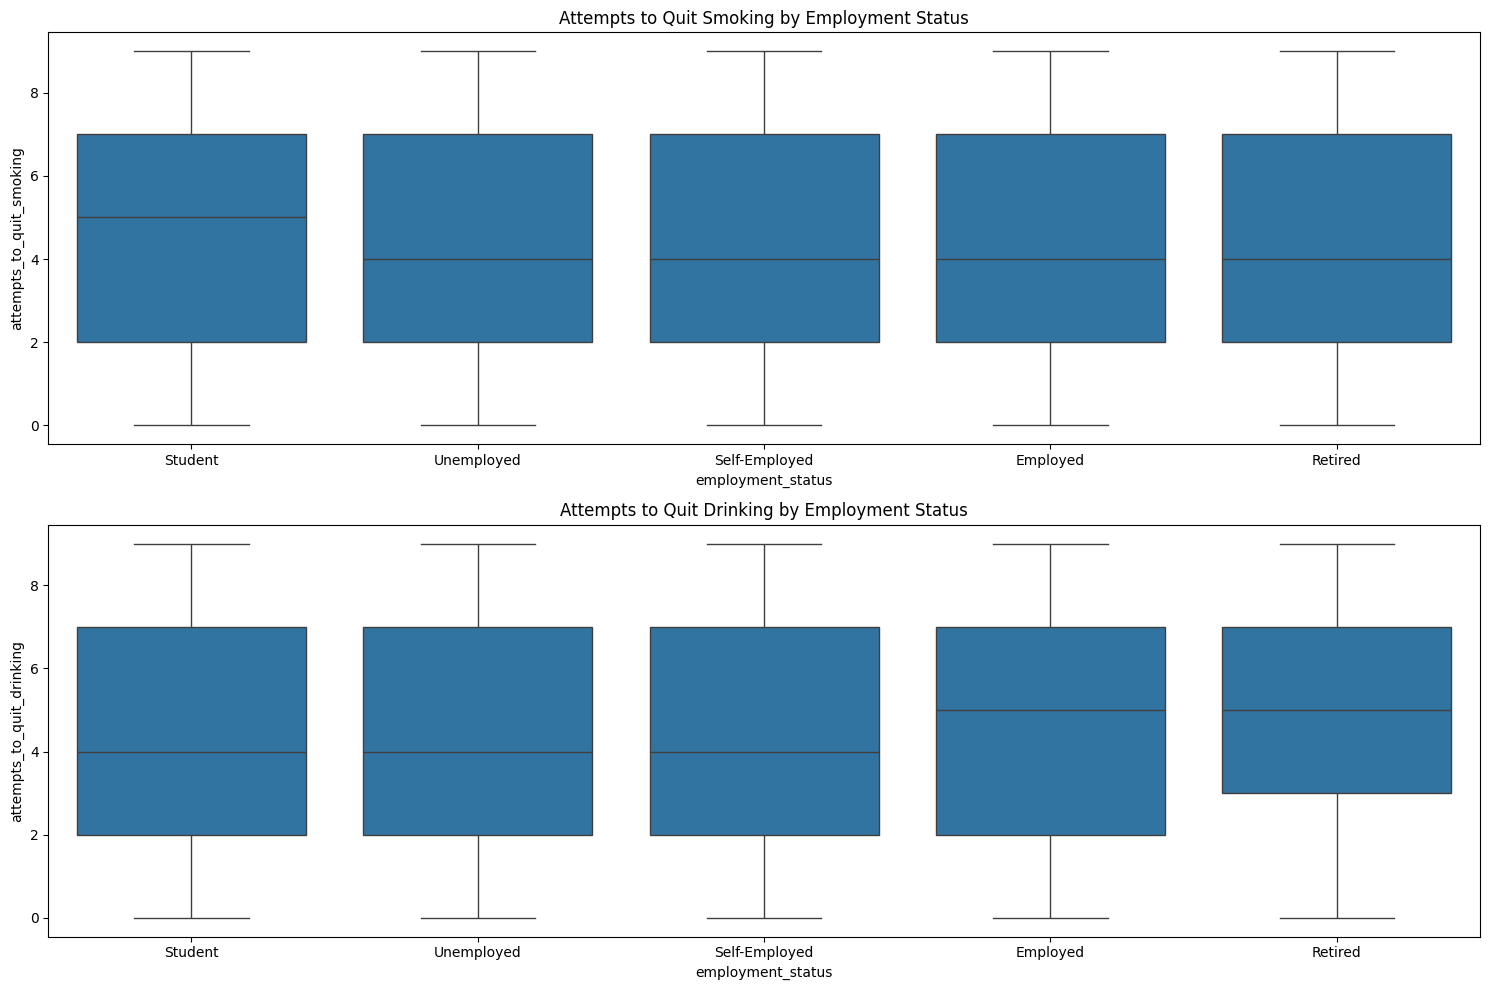

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical columns
numerical_cols = ['age', 'annual_income_usd', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking', 'sleep_hours', 'bmi', 'children_count', 'smokes_per_day', 'drinks_per_week', 'age_started_smoking', 'age_started_drinking']
print(df[numerical_cols].describe())

# Data distribution analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between addiction variables and demographic/socioeconomic factors
plt.figure(figsize=(15, 10))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(2, 1, i + 1)
    sns.boxplot(x='education_level', y=col, data=df)
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Education Level')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(2, 1, i + 1)
    sns.boxplot(x='employment_status', y=col, data=df)
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Employment Status')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the distributions of key variables and identify potential patterns and relationships between them. Visualize the correlation between variables.


**Reasoning**:
Create visualizations to explore the distributions of key variables, relationships between them, and trends over time, if applicable.



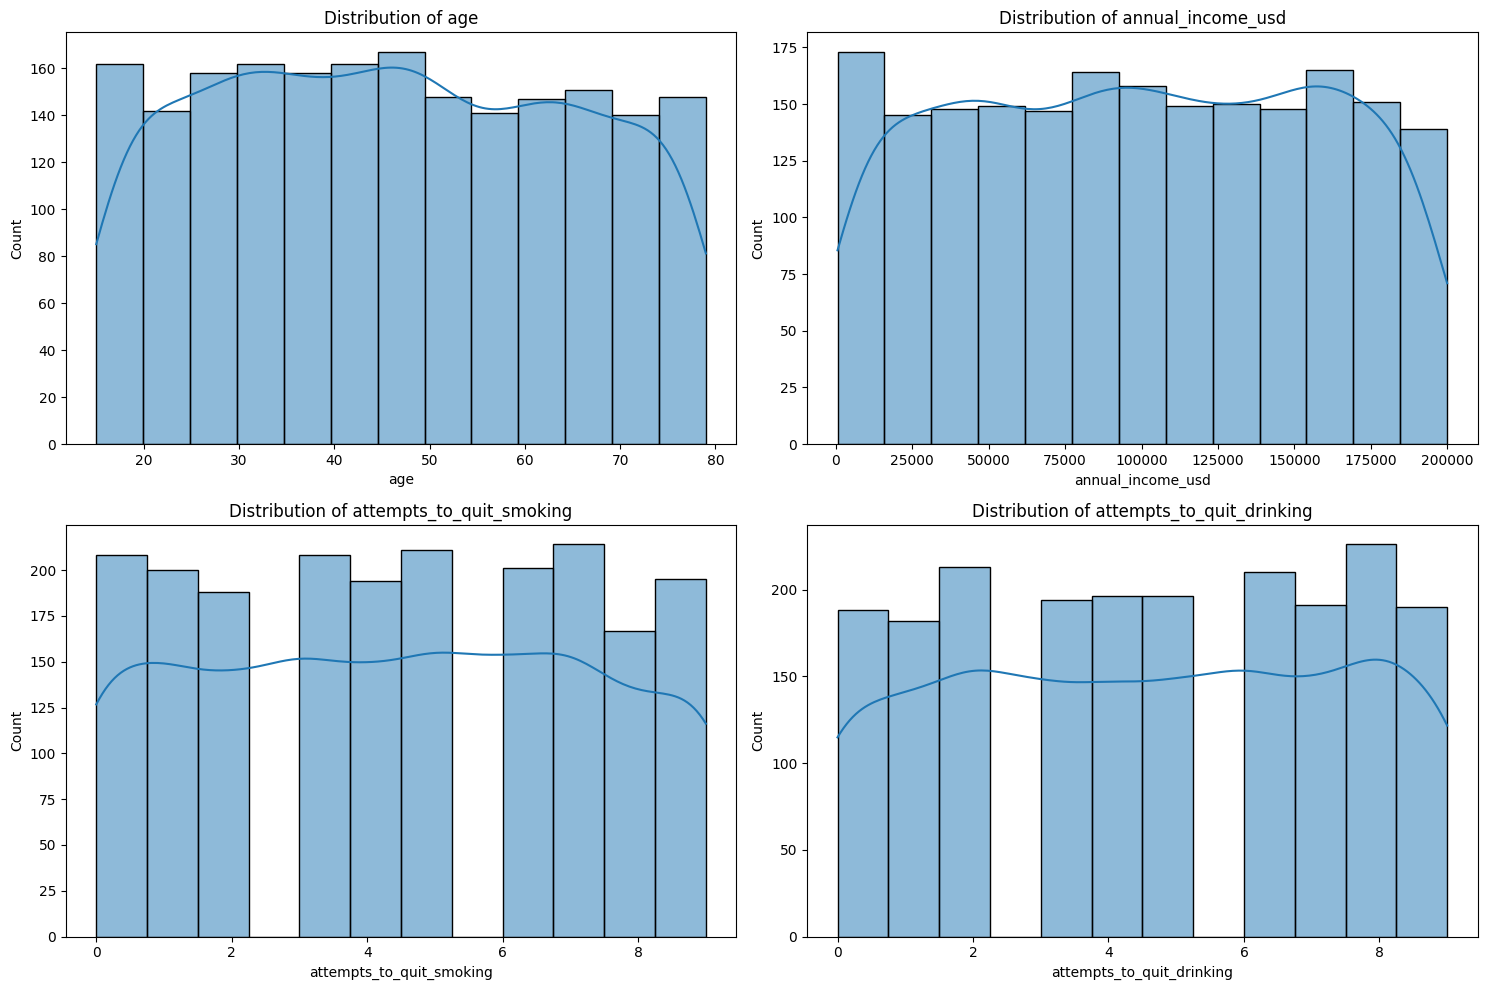

<ipython-input-6-db492f790db7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y=col, data=df, palette="Set3")
<ipython-input-6-db492f790db7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y=col, data=df, palette="Set3")


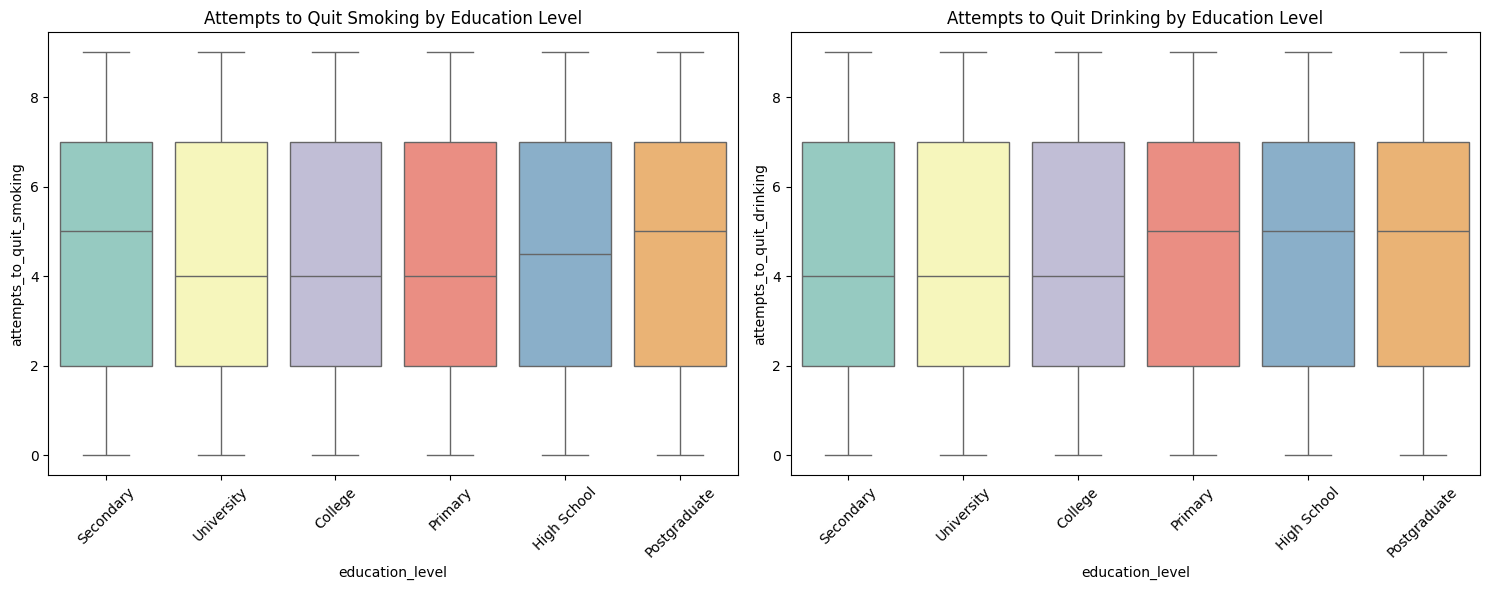

<ipython-input-6-db492f790db7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_status', y=col, data=df, palette="Set2")
<ipython-input-6-db492f790db7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_status', y=col, data=df, palette="Set2")


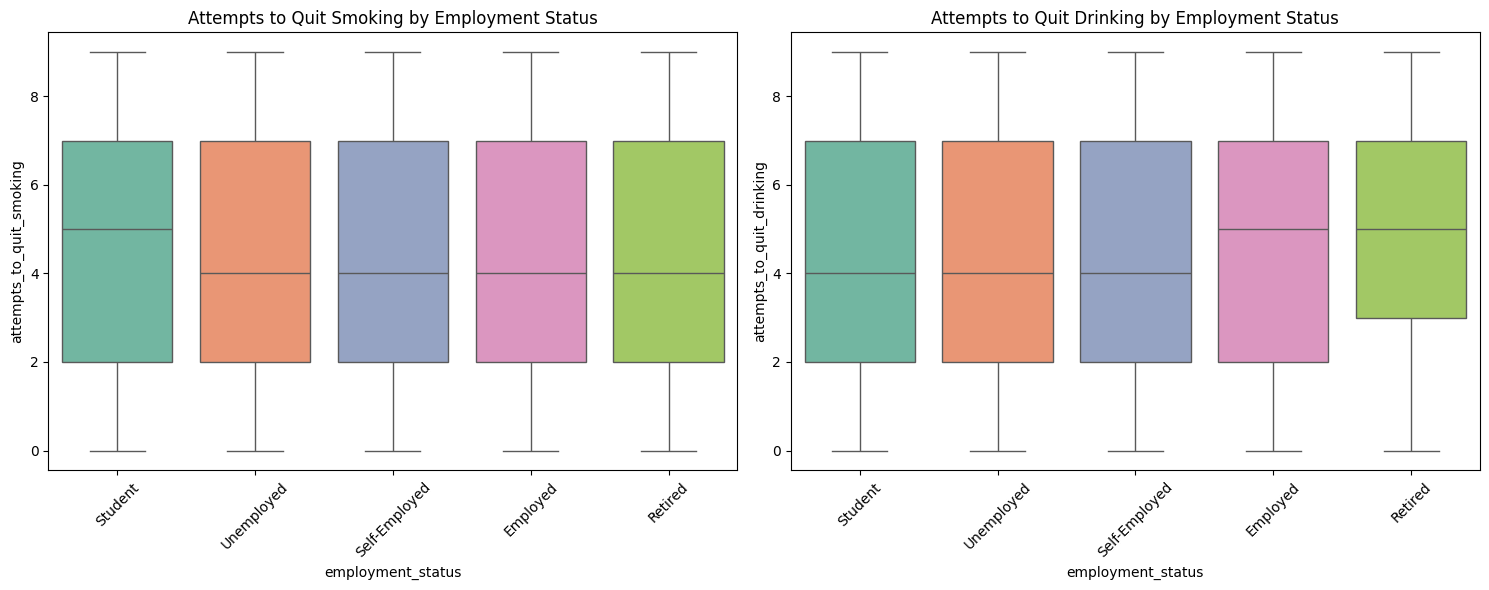

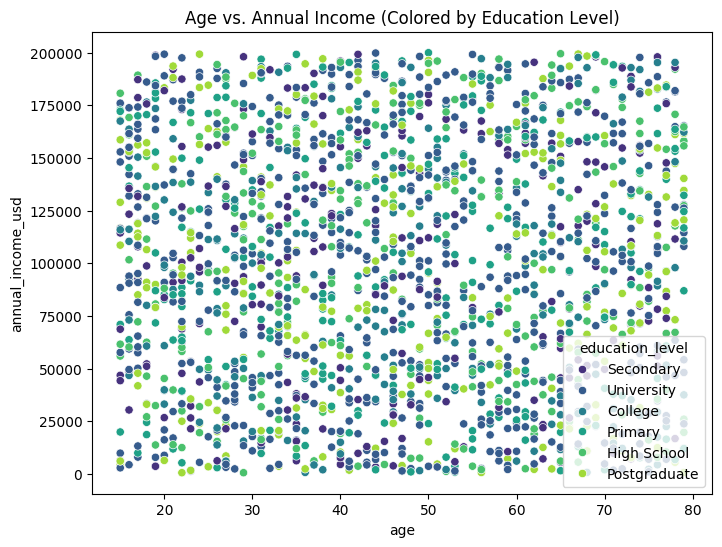

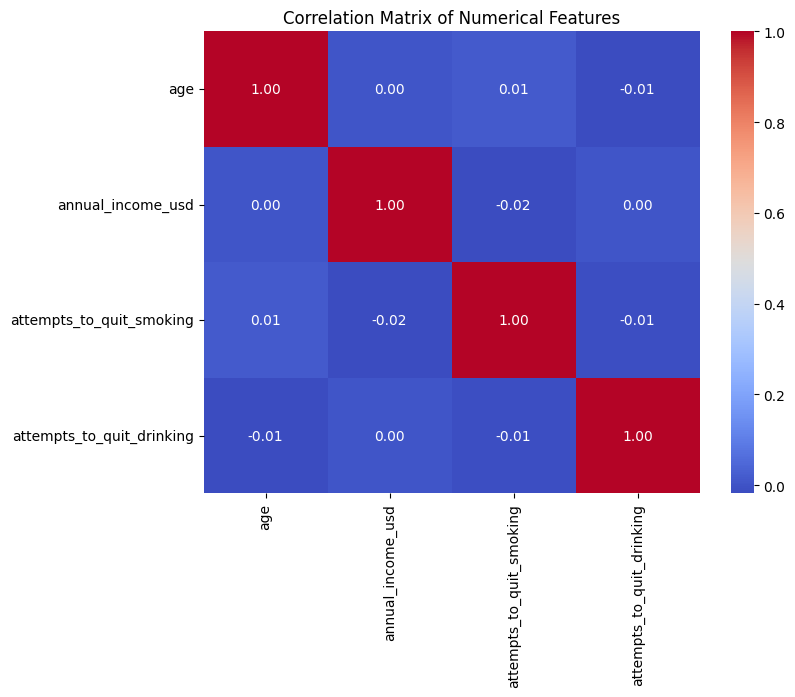

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE for key numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'annual_income_usd', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots to examine relationships
plt.figure(figsize=(15, 6))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='education_level', y=col, data=df, palette="Set3")
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Education Level')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 6))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='employment_status', y=col, data=df, palette="Set2")
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Employment Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Scatter plots to explore relationships (example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='annual_income_usd', hue='education_level', data=df, palette="viridis")
plt.title('Age vs. Annual Income (Colored by Education Level)')
plt.show()

# Heatmap of the correlation matrix
correlation_matrix = df[['age', 'annual_income_usd', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
The previous code block generated visualizations, but there were warnings about the `palette` argument in `seaborn.boxplot`.  I will fix these warnings by assigning the `x` variable to `hue` and setting `legend=False`.  I will also add more informative titles and labels to the plots.



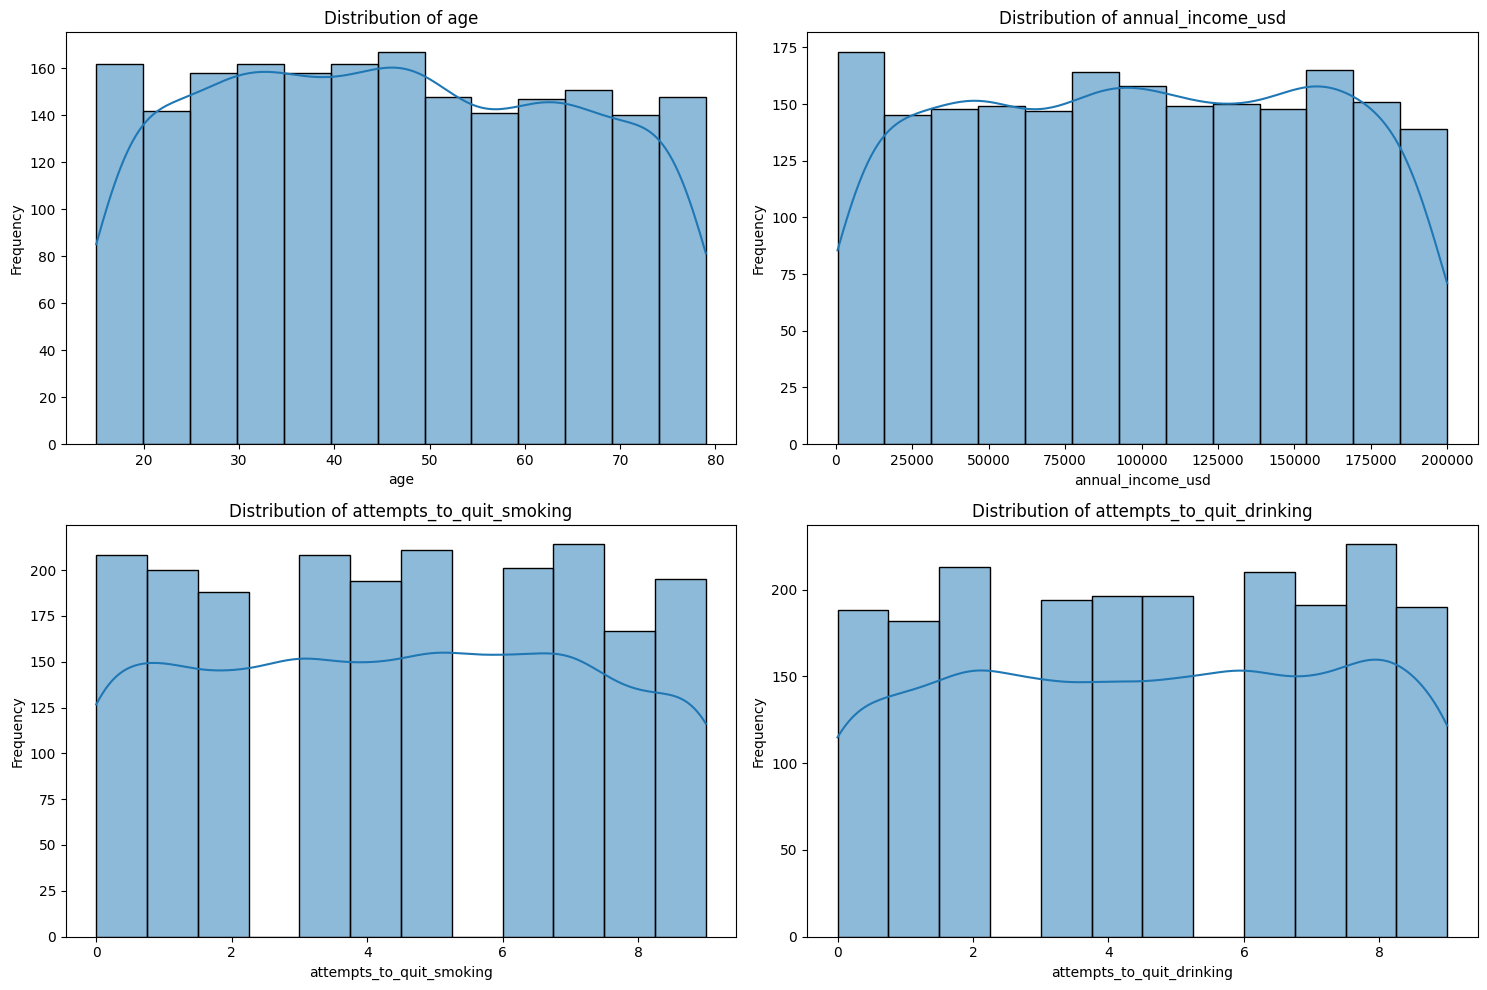

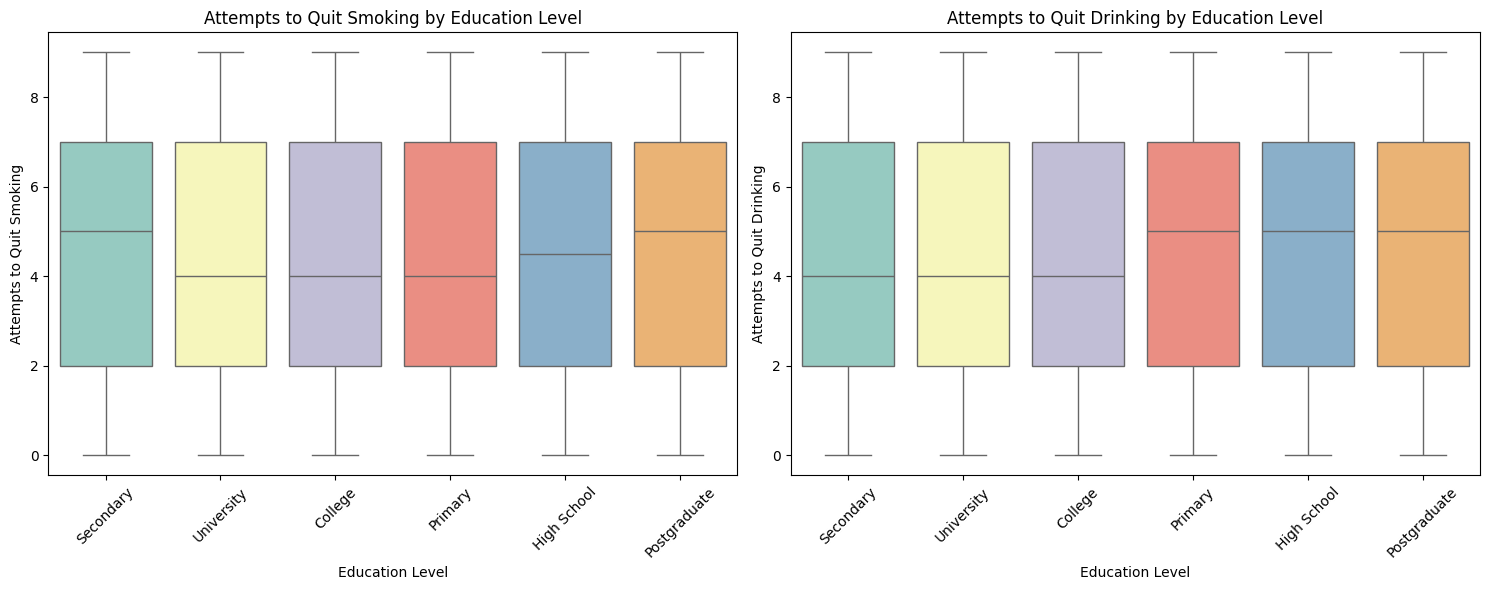

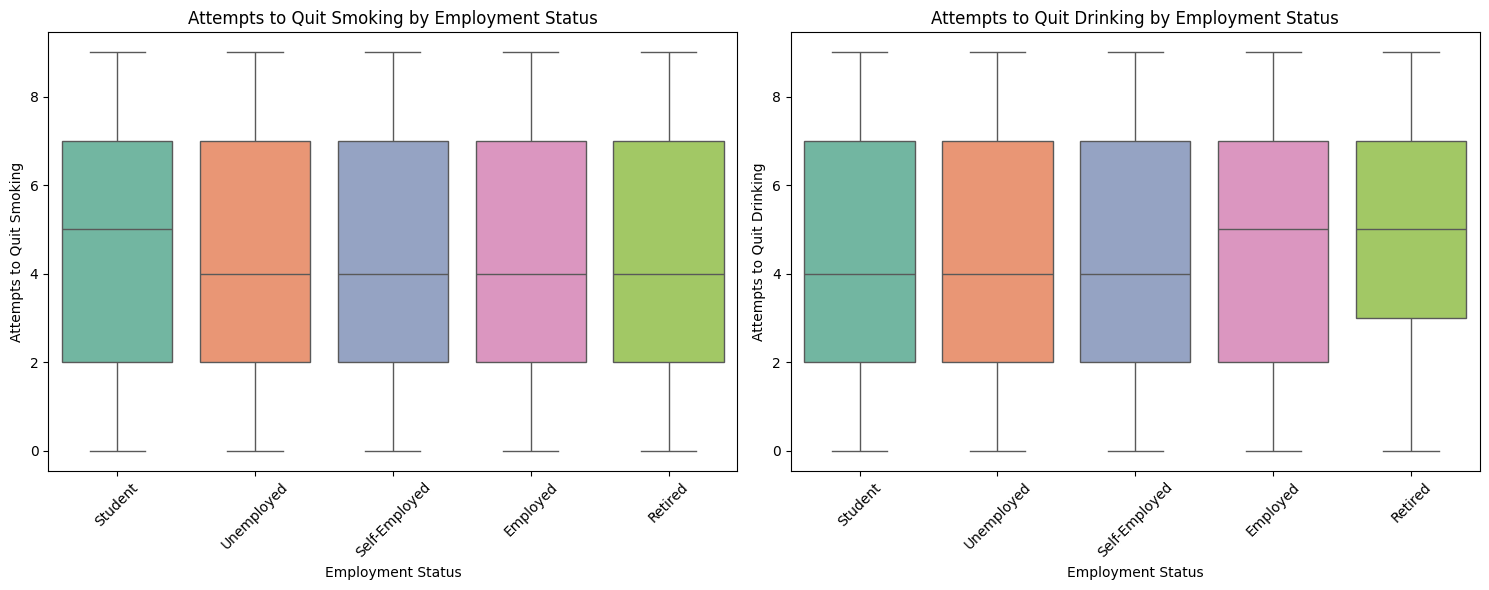

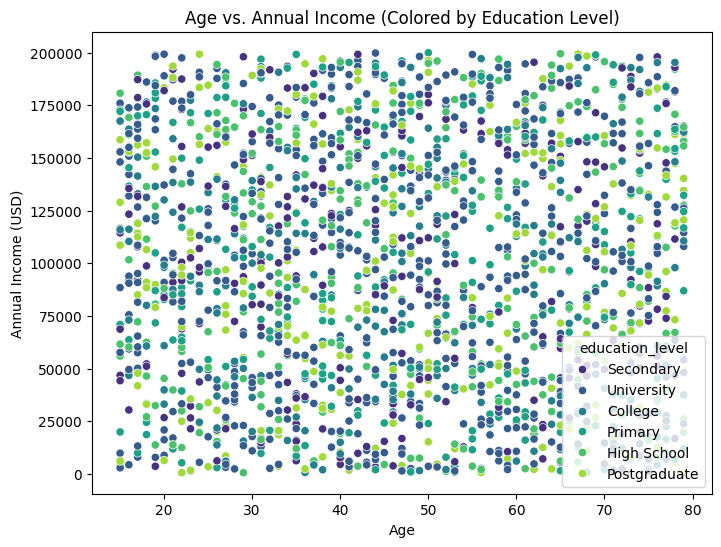

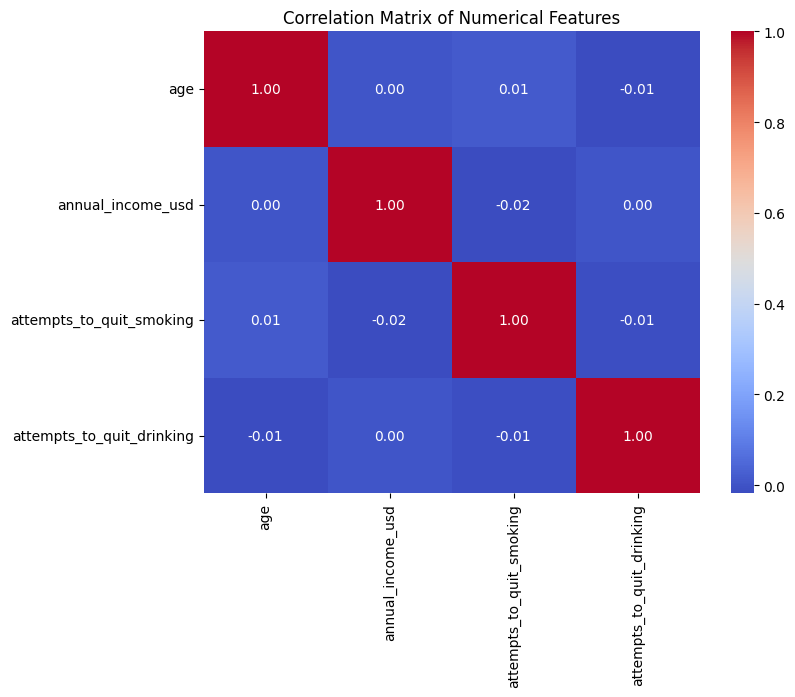

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE for key numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'annual_income_usd', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots to examine relationships
plt.figure(figsize=(15, 6))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='education_level', y=col, data=df, hue='education_level', palette="Set3", legend=False)
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel(f'Attempts to Quit {col.split("_")[-1].title()}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
for i, col in enumerate(['attempts_to_quit_smoking', 'attempts_to_quit_drinking']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='employment_status', y=col, data=df, hue='employment_status', palette="Set2", legend=False)
    plt.title(f'Attempts to Quit {col.split("_")[-1].title()} by Employment Status')
    plt.xlabel('Employment Status')
    plt.ylabel(f'Attempts to Quit {col.split("_")[-1].title()}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots to explore relationships (example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='annual_income_usd', hue='education_level', data=df, palette="viridis")
plt.title('Age vs. Annual Income (Colored by Education Level)')
plt.xlabel('Age')
plt.ylabel('Annual Income (USD)')
plt.show()


# Heatmap of the correlation matrix
correlation_matrix = df[['age', 'annual_income_usd', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data exploration

### Subtask:
Further explore the data to identify trends and patterns related to addiction rates across different demographics or time periods.


**Reasoning**:
Analyze the relationship between addiction rates and demographic factors using groupby, aggregations, and visualizations.



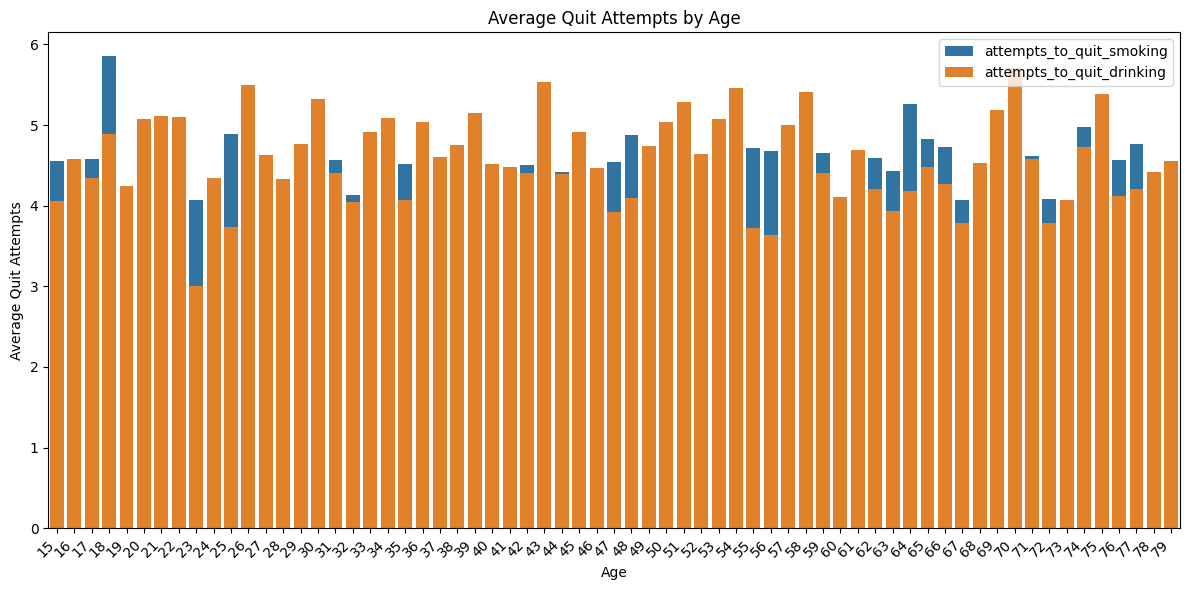

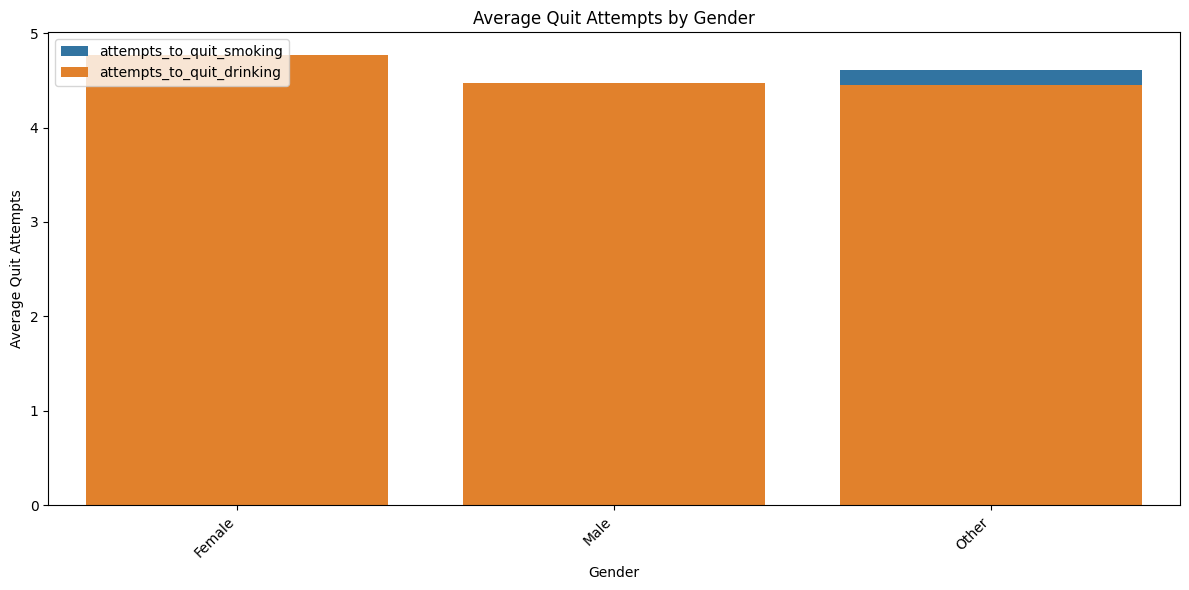

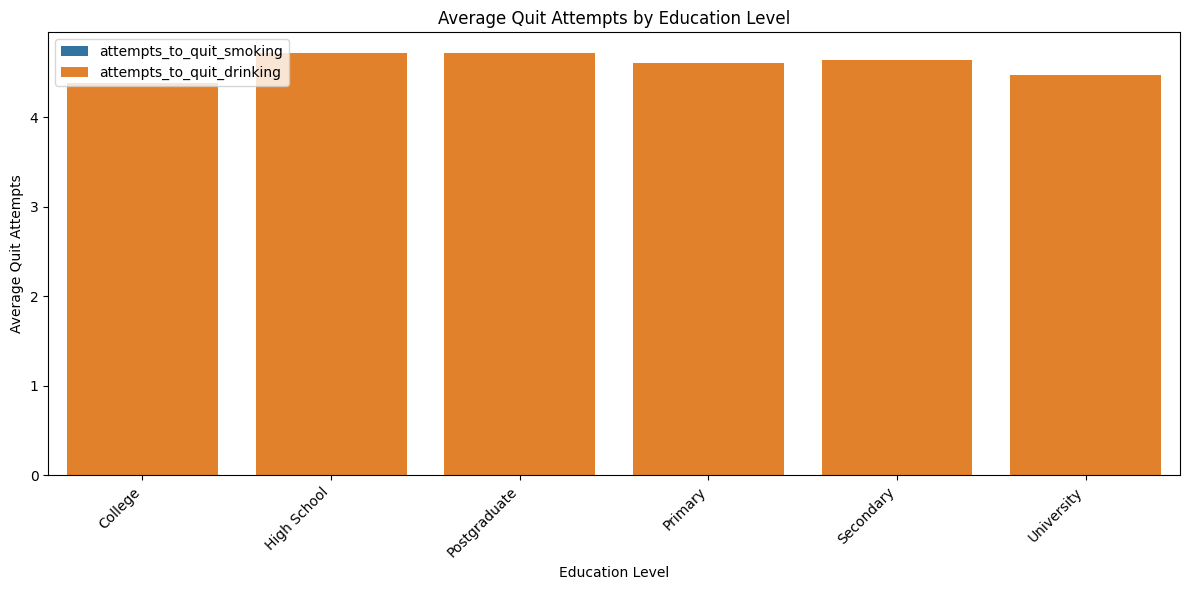

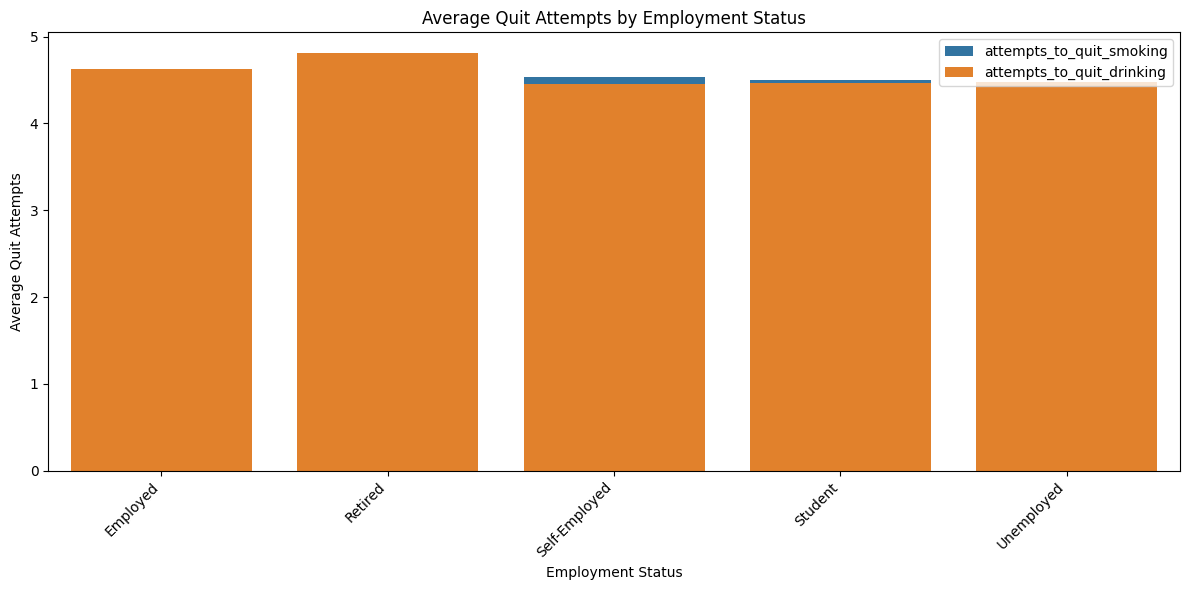

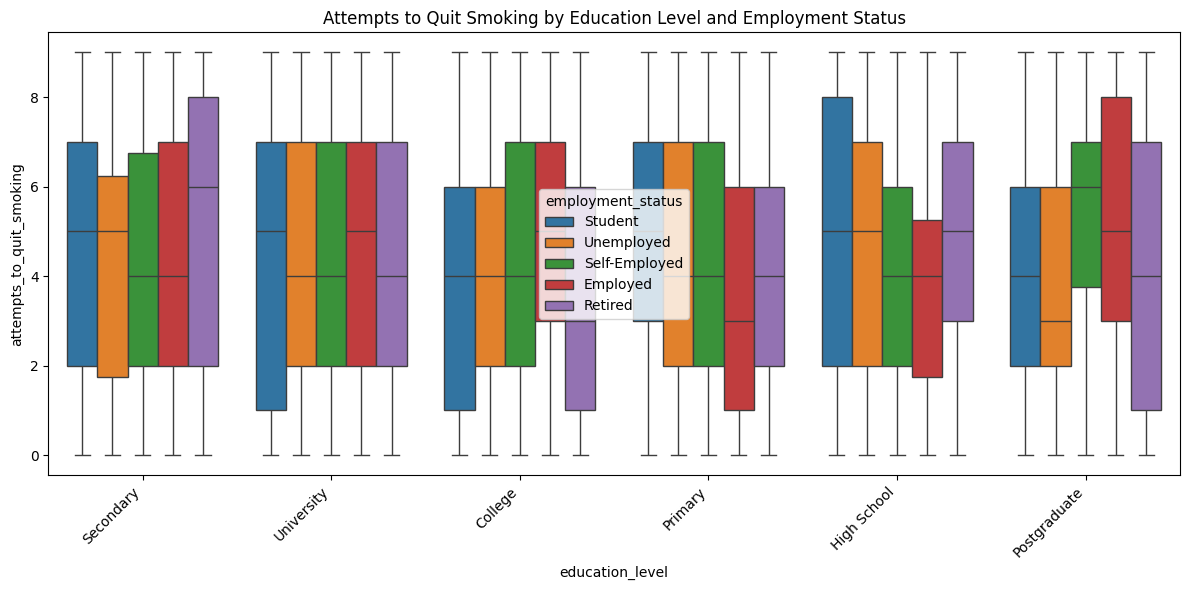

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group data by demographic factors and calculate the mean attempts to quit
demographics = ['age', 'gender', 'education_level', 'employment_status']
addiction_cols = ['attempts_to_quit_smoking', 'attempts_to_quit_drinking']

for demo in demographics:
    grouped_data = df.groupby(demo)[addiction_cols].mean().reset_index()
    plt.figure(figsize=(12, 6))
    for addiction in addiction_cols:
        sns.barplot(x=demo, y=addiction, data=grouped_data, label=addiction)
    plt.title(f'Average Quit Attempts by {demo.replace("_", " ").title()}')
    plt.xlabel(demo.replace("_", " ").title())
    plt.ylabel('Average Quit Attempts')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze potential interactions between demographic factors
# Example: Age vs. Education level
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_level', y='attempts_to_quit_smoking', hue='employment_status', data=df)
plt.title('Attempts to Quit Smoking by Education Level and Employment Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:


### Data Analysis Key Findings
* **Data Characteristics:** The dataset contains 3000 rows and 25 columns, including demographic, socioeconomic, addiction-related, health, and social factors.  Missing values were present in 'education\_level', 'social\_support', and 'therapy\_history' columns.
* **Missing Value Imputation:** Missing 'education\_level' and 'social\_support' values were imputed using the mode, while rows with missing 'therapy\_history' values were removed.
* **Data Distribution:** Key numerical variables like age, income, and quit attempts were analyzed for their distribution, skewness, and potential outliers using histograms and KDE plots.
* **Correlation Analysis:** A correlation matrix and heatmap revealed the linear relationships between numerical variables, highlighting potential associations.
* **Demographic Influences on Addiction:**  Analysis showed relationships between attempts to quit smoking and drinking and demographic/socioeconomic factors like education level and employment status.  Visualizations (bar charts and box plots) illustrated potential differences in quit attempts across various categories.  For example, there may be a correlation between education level and quit attempts.
* **Age and Income Relationship:**  A potential relationship was explored between age and annual income, further categorized by education level.

### Insights or Next Steps
* Investigate the potential interactions between different demographic and socioeconomic factors and their combined influence on addiction quit attempts.
* Explore more advanced statistical methods or machine learning models to predict quit success rates based on the identified patterns.


## **Outcomes**

1. Data Loading:

Outcome: I learnt how to load a CSV file into a pandas DataFrame.
Reasoning: This is the fundamental first step to access and work with our data in Python using the pandas library.

2. Data Exploration:

Outcome: I gained an understanding of the dataset's structure, identified missing values, determined the data types of each column, and visualized the distribution of key numerical variables. I also learned the dimensions (shape) of the DataFrame.
Reasoning: This step is crucial for getting a feel for your data before I start manipulating it. Understanding the data types, missing values, and distributions helps you identify potential issues and decide on appropriate cleaning and analysis techniques.
3. Data Cleaning:

Outcome: I learnt how to handle missing values using imputation (replacing with the mode) and by dropping rows. I also learned how to standardize categorical data (converting to lowercase) and remove duplicate rows. I learned how to address FutureWarning messages in your code.
Reasoning: Data cleaning is essential for ensuring the quality and reliability of your data. Inconsistent data, missing values, and duplicates can lead to inaccurate analysis and flawed conclusions. I also learned to refine your code based on warnings, which is a good practice in programming.
4. Data Analysis:

Outcome: I learned how to calculate descriptive statistics for numerical columns, analyze data distributions using histograms and KDE plots, compute correlation matrices, and analyze relationships between addiction variables and demographic/socioeconomic factors using box plots.
Reasoning: This step allows you to delve deeper into your data and identify patterns, trends, and relationships between variables. Descriptive statistics provide a summary of your data, while visualizations help you see these relationships visually. Correlation analysis helps identify linear associations.
5. Data Visualization:

Outcome: I learned how to create various visualizations, including histograms, box plots, scatter plots, and heatmaps, to visually represent data distributions, relationships between variables, and correlations. I also learned how to improve plot readability by adding informative titles and labels and handling palette warnings in Seaborn.
Reasoning: Data visualization is a powerful tool for communicating insights from your data. Visualizations make complex data easier to understand and help identify patterns and trends that might not be obvious from raw data or statistics alone. You also learned how to refine your visualizations for better clarity and to address library-specific warnings.
6. Further Data Exploration (Grouped Analysis):

Outcome: I learned how to group your data by demographic factors and calculate aggregate statistics (mean) for addiction-related variables. I visualized these grouped results using bar plots to compare average quit attempts across different demographic categories. I also explored potential interactions between demographic factors using box plots.
Reasoning: Grouped analysis allows us to investigate how variables differ across different categories or segments of your data. This is particularly useful for understanding how demographic factors might influence outcomes like addiction quit attempts.